In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
data = pd.read_csv('/content/weather_classification_data.csv')
data

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


**To gain info about the data type and null value**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


**Finding the number of unique values using value_counts() function**

In [6]:
data['Cloud Cover'].value_counts()

,count
Cloud Cover,
overcast,6090
partly cloudy,4560
clear,2139
cloudy,411


In [7]:
data['Weather Type'].value_counts()

,count
Weather Type,
Rainy,3300
Cloudy,3300
Sunny,3300
Snowy,3300


In [8]:
data.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


Finding the number of duplicate values

In [9]:
data.duplicated().sum()

0

<Axes: xlabel='Season', ylabel='count'>

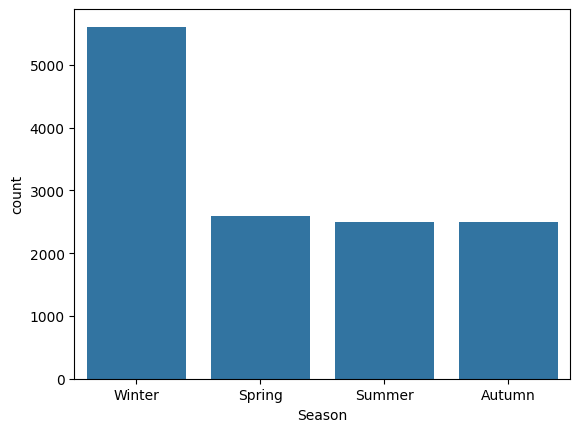

In [10]:
sns.countplot(x = "Season", data = data)

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'Wind Speed'}>],
       [<Axes: title={'center': 'Precipitation (%)'}>,
        <Axes: title={'center': 'Atmospheric Pressure'}>,
        <Axes: title={'center': 'UV Index'}>],
       [<Axes: title={'center': 'Visibility (km)'}>, <Axes: >, <Axes: >]],
      dtype=object)

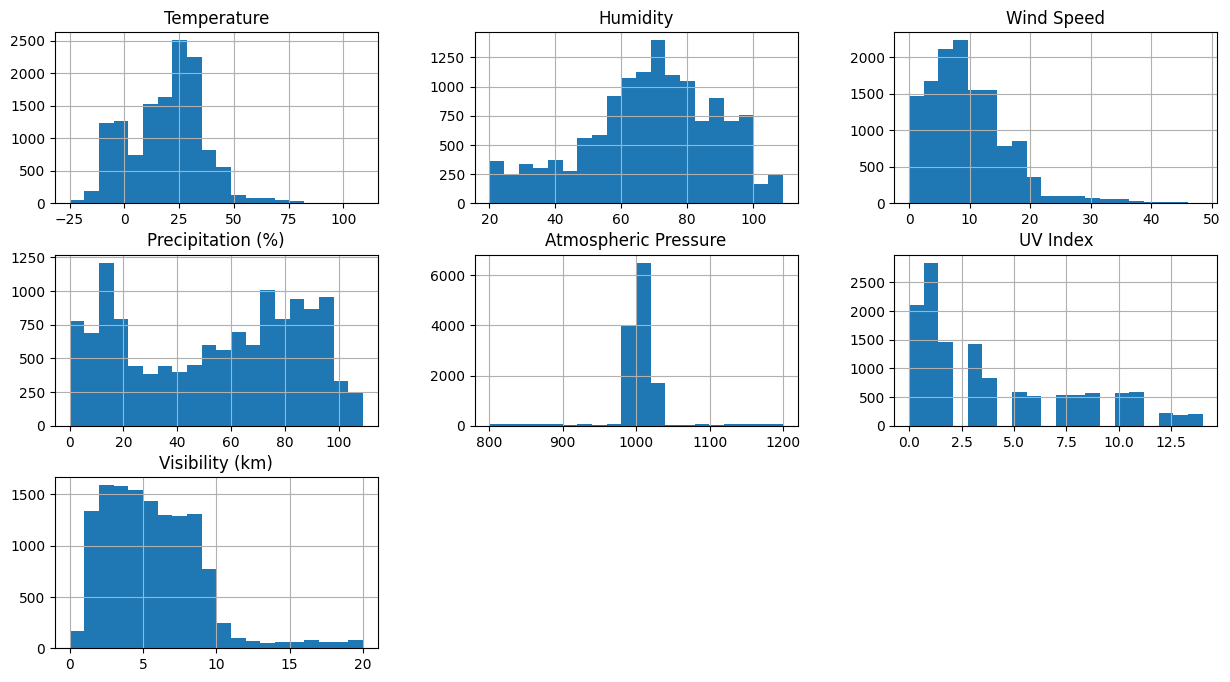

In [11]:
#visualising the distribution of numerical features
data.hist(bins = 20, figsize= (15, 8))

<ipython-input-12-3e9a1fa16e38>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data['Cloud Cover'], order=data['Cloud Cover'].value_counts(ascending=False).index, palette='Set2', hue=None, legend=False)
<ipython-input-12-3e9a1fa16e38>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x=data['Season'], order=data['Season'].value_counts(ascending=False).index, palette='Set3', hue=None, legend=False)
<ipython-input-12-3e9a1fa16e38>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(x=data['Location'], order=data['Locat

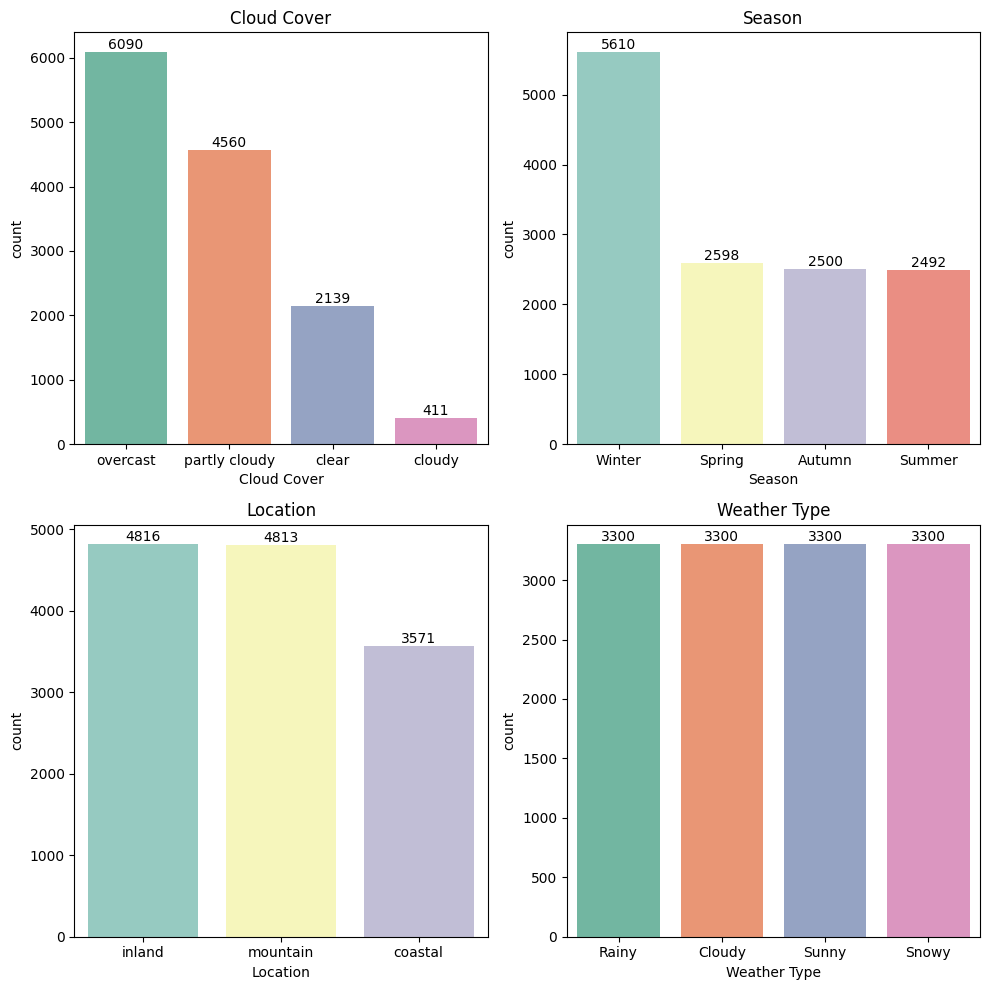

In [12]:
plt.figure(figsize=(10, 10))

# Cloud Cover
plt.subplot(2, 2, 1)
ax = sns.countplot(x=data['Cloud Cover'], order=data['Cloud Cover'].value_counts(ascending=False).index, palette='Set2', hue=None, legend=False)
if ax.patches:  # Check if there are bars (patches) in the plot
    abs_values = data['Cloud Cover'].value_counts(ascending=False).values
    for patch, label in zip(ax.patches, abs_values):
        ax.text(patch.get_x() + patch.get_width() / 2, patch.get_height(), label, ha='center', va='bottom')
plt.xlabel("Cloud Cover")
plt.title("Cloud Cover")

# Season
plt.subplot(2, 2, 2)
ax1 = sns.countplot(x=data['Season'], order=data['Season'].value_counts(ascending=False).index, palette='Set3', hue=None, legend=False)
if ax1.patches:
    abs1_values = data['Season'].value_counts(ascending=False).values
    for patch, label in zip(ax1.patches, abs1_values):
        ax1.text(patch.get_x() + patch.get_width() / 2, patch.get_height(), label, ha='center', va='bottom')
plt.xlabel("Season")
plt.title("Season")

# Location
plt.subplot(2, 2, 3)
ax2 = sns.countplot(x=data['Location'], order=data['Location'].value_counts(ascending=False).index, palette='Set3', hue=None, legend=False)
if ax2.patches:
    abs2_values = data['Location'].value_counts(ascending=False).values
    for patch, label in zip(ax2.patches, abs2_values):
        ax2.text(patch.get_x() + patch.get_width() / 2, patch.get_height(), label, ha='center', va='bottom')
plt.xlabel("Location")
plt.title("Location")

# Weather Type
plt.subplot(2, 2, 4)
ax3 = sns.countplot(x=data['Weather Type'], order=data['Weather Type'].value_counts(ascending=False).index, palette='Set2', hue=None, legend=False)
if ax3.patches:
    abs3_values = data['Weather Type'].value_counts(ascending=False).values
    for patch, label in zip(ax3.patches, abs3_values):
        ax3.text(patch.get_x() + patch.get_width() / 2, patch.get_height(), label, ha='center', va='bottom')
plt.xlabel("Weather Type")
plt.title("Weather Type")

plt.tight_layout()
plt.show()


<ipython-input-13-eee804532adb>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'Temperature', y ='Humidity',data = data,ci = None)
<ipython-input-13-eee804532adb>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'Temperature', y ='Wind Speed', data =data,ci = None)
<ipython-input-13-eee804532adb>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'Temperature', y ='Precipitation (%)', data =data,ci = None)
<ipython-input-13-eee804532adb>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'Temperature', y ='Atmospheric Pressure', data =data,ci = None)
<ipython-input-13-eee804532adb>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'Temperature', y ='UV Index', d

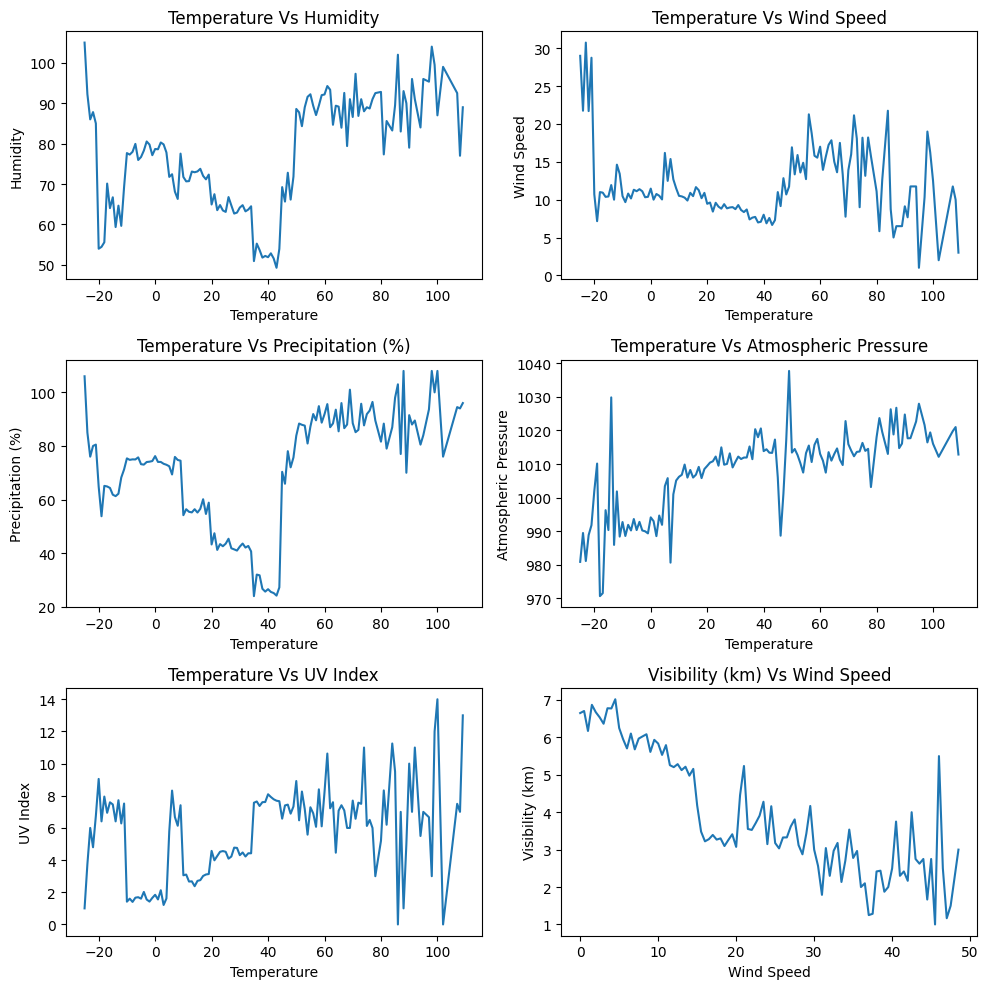

In [13]:
plt.figure(figsize =(10,10))

plt.subplot(3,2,1)
sns.lineplot(x = 'Temperature', y ='Humidity',data = data,ci = None)
plt.title("Temperature Vs Humidity")

plt.subplot(3,2,2)
sns.lineplot(x = 'Temperature', y ='Wind Speed', data =data,ci = None)
plt.title("Temperature Vs Wind Speed")

plt.subplot(3,2,3)
sns.lineplot(x = 'Temperature', y ='Precipitation (%)', data =data,ci = None)
plt.title("Temperature Vs Precipitation (%)")

plt.subplot(3,2,4)
sns.lineplot(x = 'Temperature', y ='Atmospheric Pressure', data =data,ci = None)
plt.title("Temperature Vs Atmospheric Pressure")

plt.subplot(3,2,5)
sns.lineplot(x = 'Temperature', y ='UV Index', data =data,ci = None)
plt.title("Temperature Vs UV Index")

plt.subplot(3,2,6)
sns.lineplot(y = 'Visibility (km)', x ='Wind Speed', data =data,ci = None)
plt.title("Visibility (km) Vs Wind Speed")

plt.tight_layout()
plt.show()

<ipython-input-14-5b166ec029d1>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'Season', y ='Humidity',data = data,color = 'blue',ci = None)
<ipython-input-14-5b166ec029d1>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'Season', y ='Wind Speed', data =data,color = 'green',ci = None)
<ipython-input-14-5b166ec029d1>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'Season', y ='Precipitation (%)', data =data,color = 'orange',ci = None)
<ipython-input-14-5b166ec029d1>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'Season', y ='Atmospheric Pressure', data =data,color = 'purple',ci = None)
<ipython-input-14-5b166ec029d1>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns

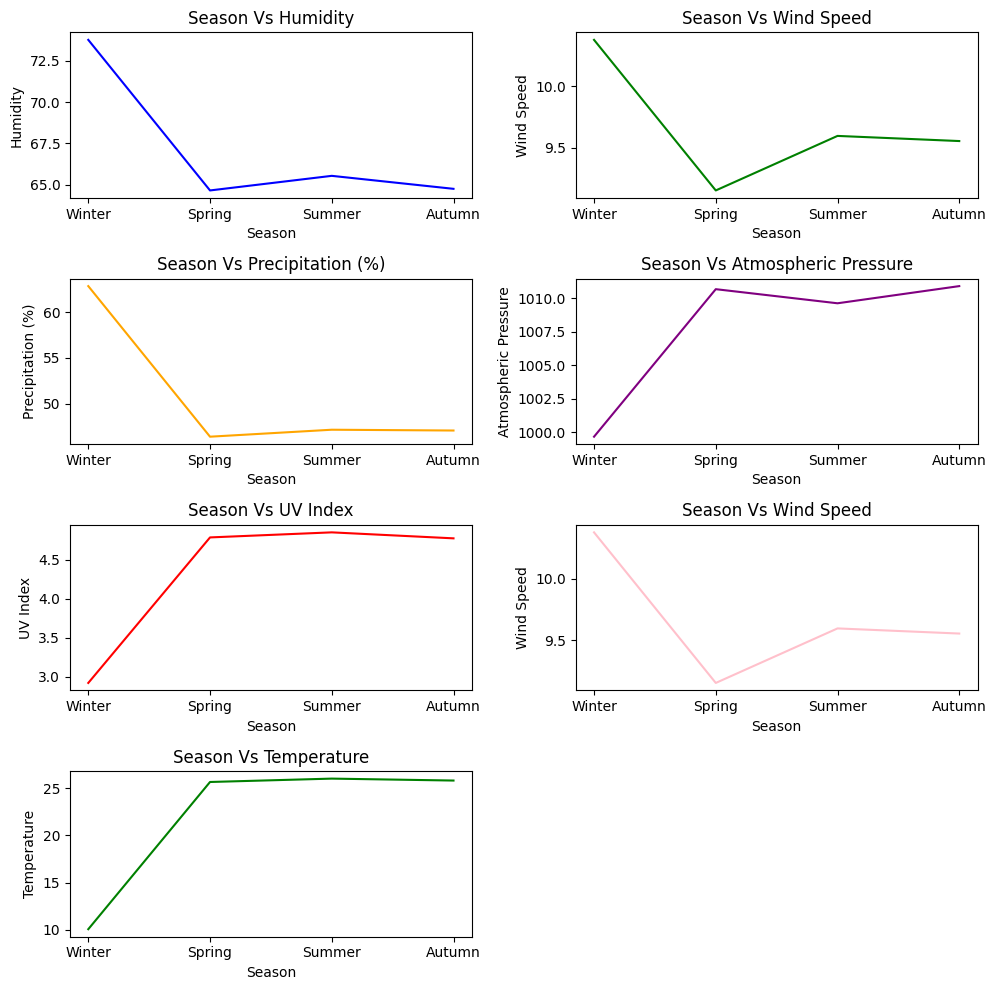

In [14]:
plt.figure(figsize =(10,10))

plt.subplot(4,2,1)
sns.lineplot(x = 'Season', y ='Humidity',data = data,color = 'blue',ci = None)
plt.title("Season Vs Humidity")

plt.subplot(4,2,2)
sns.lineplot(x = 'Season', y ='Wind Speed', data =data,color = 'green',ci = None)
plt.title("Season Vs Wind Speed")

plt.subplot(4,2,3)
sns.lineplot(x = 'Season', y ='Precipitation (%)', data =data,color = 'orange',ci = None)
plt.title("Season Vs Precipitation (%)")

plt.subplot(4,2,4)
sns.lineplot(x = 'Season', y ='Atmospheric Pressure', data =data,color = 'purple',ci = None)
plt.title("Season Vs Atmospheric Pressure")

plt.subplot(4,2,5)
sns.lineplot(x = 'Season', y ='UV Index', data =data,color = 'red',ci = None)
plt.title("Season Vs UV Index")

plt.subplot(4,2,6)
sns.lineplot(x = 'Season', y ='Wind Speed', data =data,color = 'pink',ci = None)
plt.title("Season Vs Wind Speed")

plt.subplot(4,2,7)
sns.lineplot(x = 'Season', y ='Temperature', data =data,color = 'green',ci = None)
plt.title("Season Vs Temperature")

plt.tight_layout()
plt.show()

<Axes: xlabel='Humidity', ylabel='Temperature'>

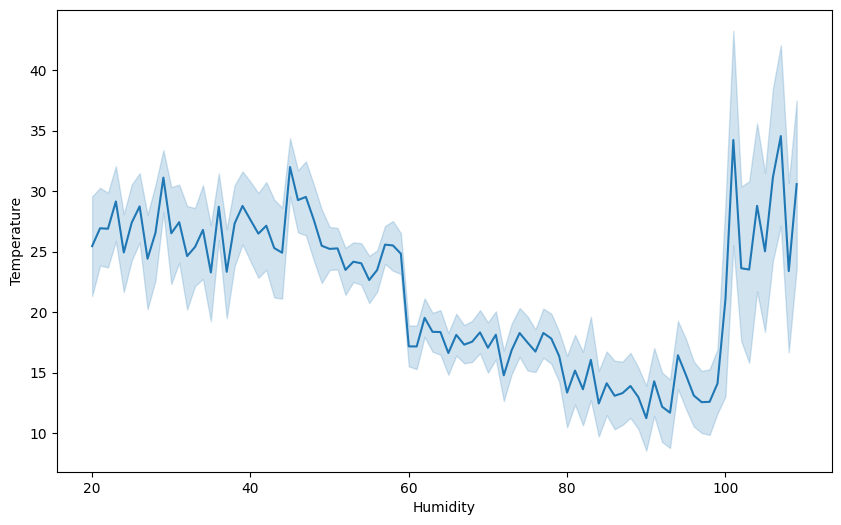

In [15]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = data, x = 'Humidity', y = 'Temperature')

<Figure size 1000x600 with 0 Axes>

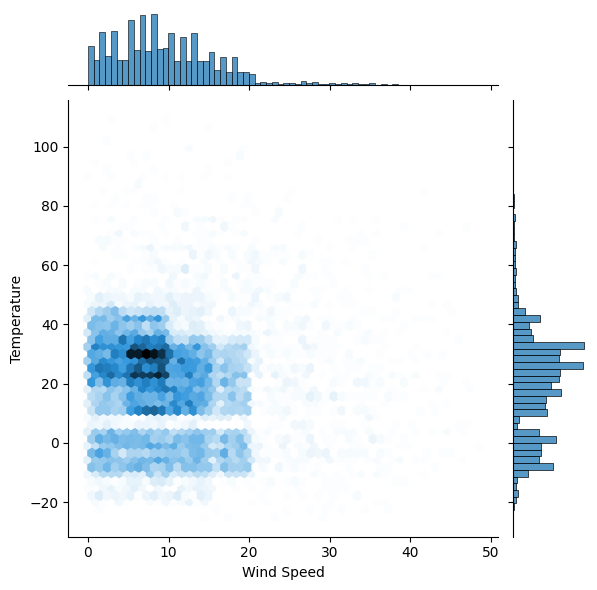

In [16]:
plt.figure(figsize = (10, 6))
sns.jointplot(data = data, x = 'Wind Speed', y = 'Temperature', kind ='hex')

<Axes: xlabel='Atmospheric Pressure', ylabel='Temperature'>

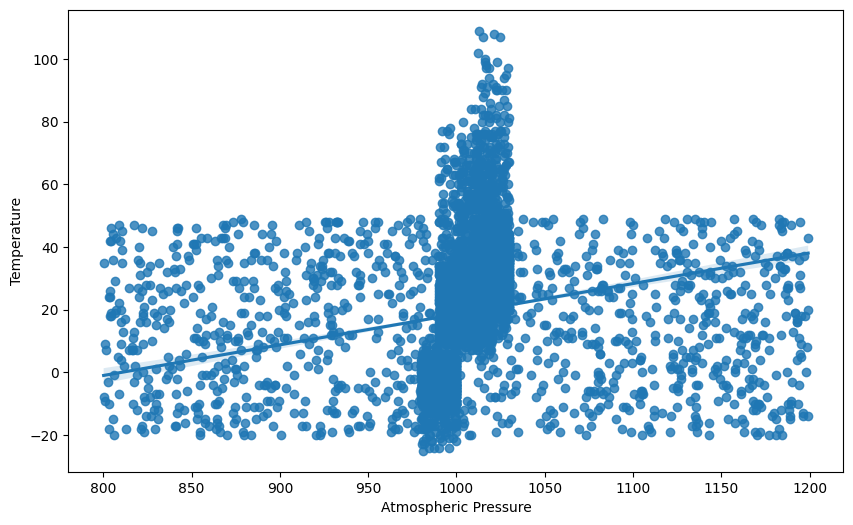

In [17]:
plt.figure(figsize = (10, 6))
sns.regplot(data = data, x = 'Atmospheric Pressure', y = 'Temperature')

<Axes: xlabel='Season', ylabel='Wind Speed'>

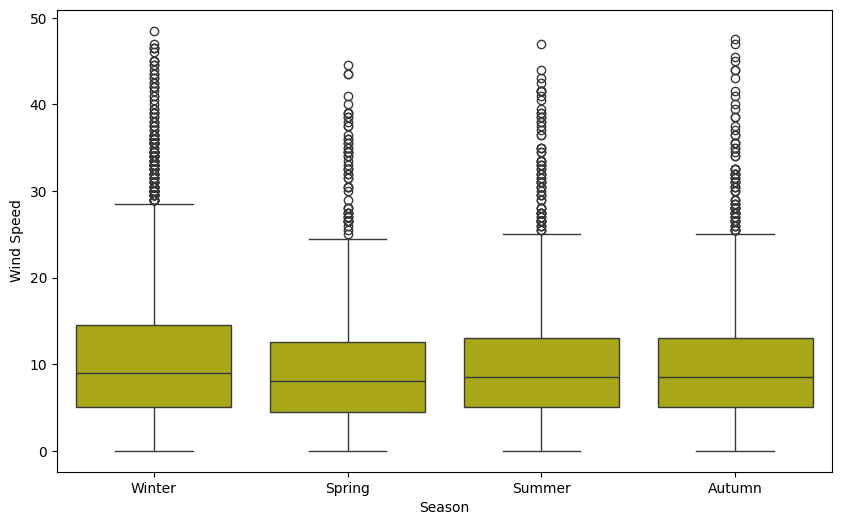

In [18]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = data, x = 'Season', y = 'Wind Speed', color = 'y')

<Axes: xlabel='Weather Type', ylabel='Humidity'>

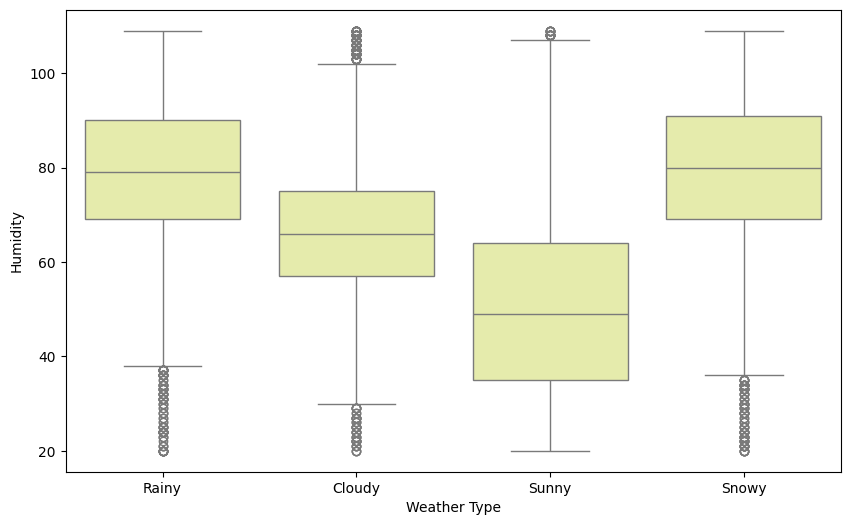

In [19]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = data, x = 'Weather Type', y = 'Humidity', color = '#EDF5A2')

**Convert categorical values into numerical**

In [20]:
le_Cloud_Cover = LabelEncoder()
le_Season = LabelEncoder()

le_Location  = LabelEncoder()
le_Weather_Type  = LabelEncoder()


data['Cloud_Cover1'] = le_Cloud_Cover.fit_transform(data['Cloud Cover'])
data['Season1'] = le_Season.fit_transform(data['Season'])
data['Location1'] = le_Location.fit_transform(data['Location'])
data['Weather_Type1'] = le_Weather_Type.fit_transform(data['Weather Type'])

In [21]:
df = data.drop(['Cloud Cover','Season','Weather Type','Location','Cloud_Cover1','Season1','Location1','Humidity','Wind Speed','Atmospheric Pressure'],axis='columns')
df

,Temperature,Precipitation (%),UV Index,Visibility (km),Weather_Type1
0,14.0,82.0,2,3.5,1
1,39.0,71.0,7,10.0,0
2,30.0,16.0,5,5.5,3
3,38.0,82.0,7,1.0,3
4,27.0,66.0,1,2.5,1
...,...,...,...,...,...
13195,10.0,71.0,1,1.0,1
13196,-1.0,23.0,1,6.0,2
13197,30.0,28.0,3,9.0,0
13198,3.0,94.0,0,2.0,2


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        13200 non-null  float64
 1   Precipitation (%)  13200 non-null  float64
 2   UV Index           13200 non-null  int64  
 3   Visibility (km)    13200 non-null  float64
 4   Weather_Type1      13200 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 515.8 KB


**Correlation matrix to get to know about the important column**

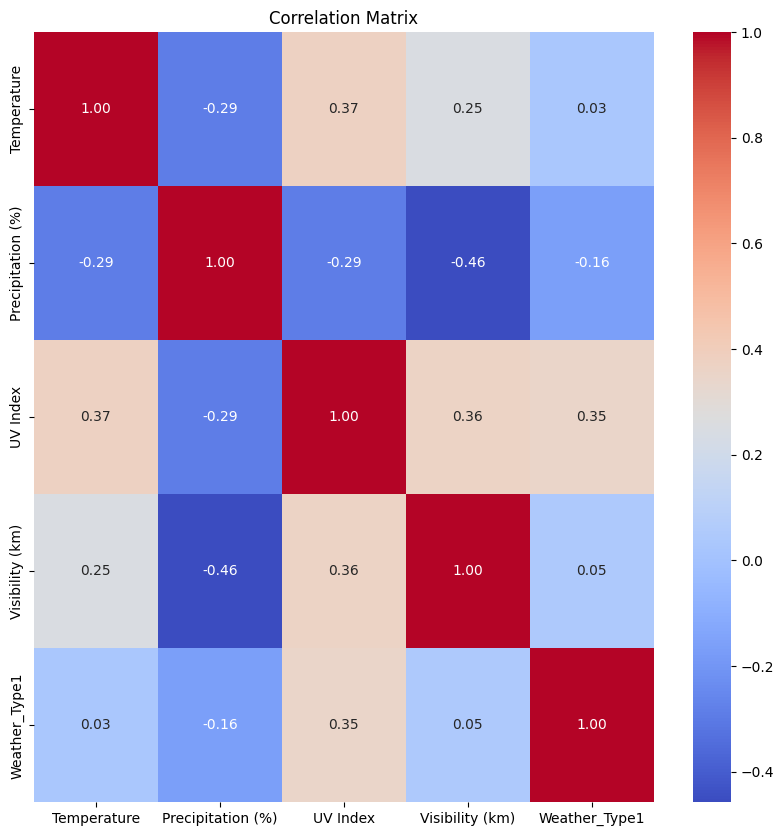

In [23]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Identifying outliers in each coulmn**

In [24]:
def det_outliers(df):
    outliers = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers

# Get outliers for each column
outliers = det_outliers(df)
for col, vals in outliers.items():
    print(f"Outliers in {col}:")
    print(vals)
    print("\n")

Outliers in Temperature:
210      78.0
228      73.0
535      80.0
709      74.0
730      76.0
         ... 
12752    90.0
12814    72.0
12878    95.0
13065    97.0
13108    81.0
Name: Temperature, Length: 92, dtype: float64


Outliers in Precipitation (%):
Series([], Name: Precipitation (%), dtype: float64)


Outliers in UV Index:
Series([], Name: UV Index, dtype: int64)


Outliers in Visibility (km):
38       16.5
113      17.5
134      17.0
300      17.0
359      16.0
         ... 
13018    16.5
13025    14.5
13083    15.0
13163    15.0
13178    15.5
Name: Visibility (km), Length: 383, dtype: float64


Outliers in Weather_Type1:
Series([], Name: Weather_Type1, dtype: int64)




**Visualisation**

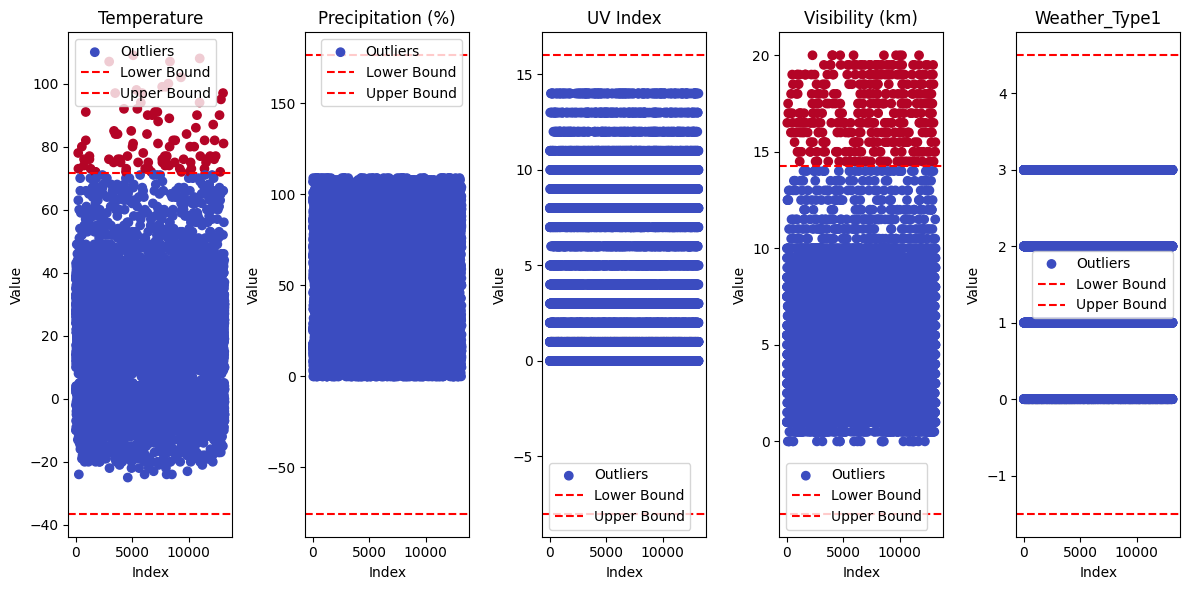

In [25]:
#Visualisation of outliers
def plot_outliers(df):
    plt.figure(figsize=(12, 6))

    for col in df.columns:
        #Calculate Q1, Q3 and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        is_outlier = (df[col] < lower_bound) | (df[col] > upper_bound)

        #  Draw Scatter Plot
        plt.subplot(1, len(df.columns), df.columns.get_loc(col) + 1)
        plt.scatter(df.index, df[col], c=is_outlier, cmap='coolwarm', label='Outliers')
        plt.axhline(y=lower_bound, color='r', linestyle='--', label='Lower Bound')
        plt.axhline(y=upper_bound, color='r', linestyle='--', label='Upper Bound')
        plt.title(col)
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.legend()

    plt.tight_layout()
    plt.show()

plot_outliers(df)

**Removal of outliers**

In [26]:
from scipy import stats

# Remove outliers using Z-Score
cleaned_df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [27]:
# Number of rows before the removal of outliers
print(f"Number of rows before: {len(df)}")

# Application to remove outliers
z_scores = np.abs(stats.zscore(df))
cleaned_df = df[(z_scores < 3).all(axis=1)]

#  Number of rows after the removal of outliers
print(f"Number of rows after: {len(cleaned_df)}")

Number of rows before: 13200
Number of rows after: 12826


In [28]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12826 entries, 0 to 13199
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        12826 non-null  float64
 1   Precipitation (%)  12826 non-null  float64
 2   UV Index           12826 non-null  int64  
 3   Visibility (km)    12826 non-null  float64
 4   Weather_Type1      12826 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 601.2 KB


**Now we'll be applying all the machine learning models**

**Logistic Regression**

In [29]:
x = cleaned_df.drop('Weather_Type1', axis = 'columns')
y = cleaned_df.Weather_Type1
x_train, y_train, x_test, y_test = train_test_split(x, y, test_size = 0.2)

In [30]:
print(x_train.shape)
print(y_train.shape)

(10260, 4)
(2566, 4)


In [31]:
# Convert one-hot encoded y_train to a 1D array of labels
if len(y_train.shape) > 1 and y_train.shape[1] > 1:
    y_train = y_train.idxmax(axis=1)  # Using idxmax for pandas DataFrame

In [32]:
print(x_train.shape)
print(y_train.shape)

(10260, 4)
(2566,)


In [33]:
# Check the shapes of X_train and y_train
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (10260, 4)
y_train shape: (2566,)
x_test shape: (10260,)
y_test shape: (2566,)


In [34]:
from sklearn.model_selection import train_test_split

X = cleaned_df.drop('Weather_Type1', axis=1)
Y = cleaned_df['Weather_Type1']

# Split data into training and test sets, ensure both X and Y are split together
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Create a pipeline with standardization and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=10000, class_weight='balanced'))
])

# Hyperparameter tuning
param_grid = {
    'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'log_reg__solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')


Training Accuracy: 0.89
Test Accuracy: 0.89


In [36]:
#model.score(x_train, y_train)

In [37]:
print("Training Class Distribution:\n", y_train.value_counts())
print("Testing Class Distribution:\n", y_test.value_counts())


Training Class Distribution:
 Weather_Type1
0    2584
2    2583
1    2573
3    2520
Name: count, dtype: int64
Testing Class Distribution:
 Weather_Type1
0    647
3    647
1    636
2    636
Name: count, dtype: int64


In [38]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, x, y, cv=5)
print("Cross-Validation Scores:", cv_scores)


Cross-Validation Scores: [0.88386594 0.89317739 0.88538012 0.88031189 0.87758285]


In [57]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[159 164 168 156]
 [177 174 147 138]
 [137 157 176 166]
 [152 155 173 167]]
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.25      0.25       647
           1       0.27      0.27      0.27       636
           2       0.27      0.28      0.27       636
           3       0.27      0.26      0.26       647

    accuracy                           0.26      2566
   macro avg       0.26      0.26      0.26      2566
weighted avg       0.26      0.26      0.26      2566



**Decision Tree**

In [43]:
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [44]:
model.score(x_train, y_train)

0.9785575048732943

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_


In [46]:
# Test accuracy
test_accuracy = best_model.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.8963


**Random Forest**

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a RandomForestClassifier instance
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf = grid_search.best_estimator_

# Evaluate training and test accuracy of the best model
rf_train_accuracy = best_rf.score(X_train, y_train)
rf_test_accuracy = best_rf.score(X_test, y_test)

print(f'Random Forest Training Accuracy: {rf_train_accuracy:.2f}')
print(f'Random Forest Test Accuracy: {rf_test_accuracy:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Random Forest Training Accuracy: 0.97
Random Forest Test Accuracy: 0.90


In [48]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Cross-Validation Score:", scores.mean())


Cross-Validation Scores: [0.90253411 0.89619883 0.89961014 0.89327485 0.88352827]
Mean Cross-Validation Score: 0.895029239766082


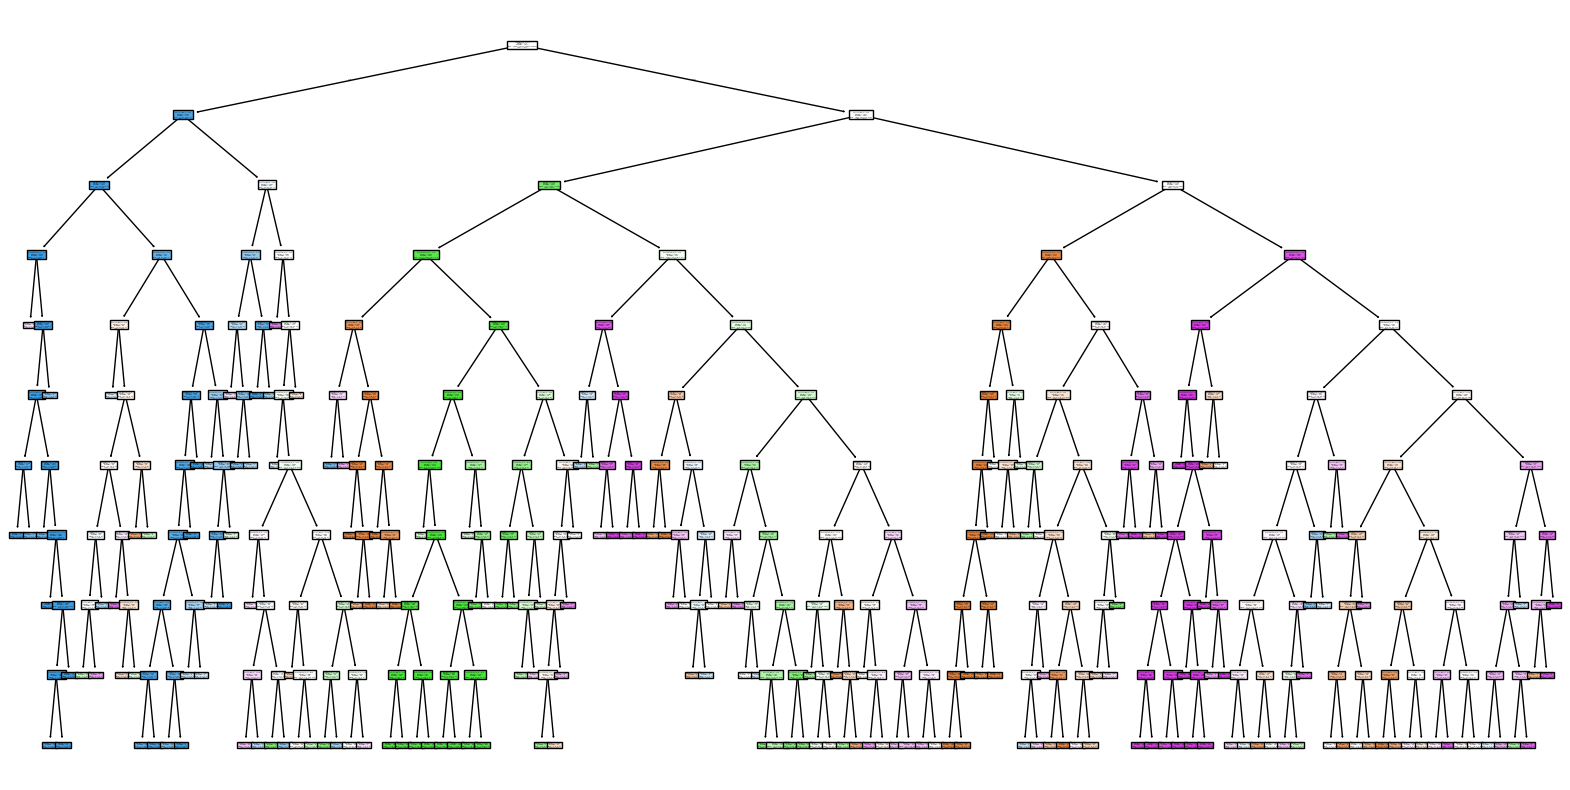

In [49]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True, feature_names=X_train.columns, class_names=['Class0', 'Class1', 'Class2', 'Class3'])
plt.show()


In [50]:
# Train the best decision tree model
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.2f}')

# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Consider using Random Forest as a backup
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_accuracy = rf.score(X_test, y_test)
print(f'Random Forest Test Accuracy: {rf_accuracy:.2f}')


Test Accuracy: 0.90
[[556  37  12  42]
 [ 30 574   9  23]
 [ 12  10 601  13]
 [ 35  33  10 569]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       647
           1       0.88      0.90      0.89       636
           2       0.95      0.94      0.95       636
           3       0.88      0.88      0.88       647

    accuracy                           0.90      2566
   macro avg       0.90      0.90      0.90      2566
weighted avg       0.90      0.90      0.90      2566

Random Forest Test Accuracy: 0.90


In [53]:
#model.score(x_test, y_test)

SVC

In [54]:
model = SVC(kernel='rbf', max_iter=10000)  # You can change the kernel if needed

# Fit the model
model.fit(X_train, y_train)

# Predict on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Printing the results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", class_report)

Training Accuracy: 0.8918128654970761
Testing Accuracy: 0.8924395946999221
Confusion Matrix:
 [[553  45  11  38]
 [ 28 576  14  18]
 [ 16   8 602  10]
 [ 37  39  12 559]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       647
           1       0.86      0.91      0.88       636
           2       0.94      0.95      0.94       636
           3       0.89      0.86      0.88       647

    accuracy                           0.89      2566
   macro avg       0.89      0.89      0.89      2566
weighted avg       0.89      0.89      0.89      2566



XG Boost

In [55]:
from xgboost import XGBClassifier

# Initialize the XGBoost model with adjusted parameters
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_estimators=200,
    max_depth=5,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0
)

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", class_report)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:21:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 0.9183235867446394
Testing Accuracy: 0.8928293063133281
Confusion Matrix:
 [[557  40  12  38]
 [ 31 573  13  19]
 [ 14   9 598  15]
 [ 28  46  10 563]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       647
           1       0.86      0.90      0.88       636
           2       0.94      0.94      0.94       636
           3       0.89      0.87      0.88       647

    accuracy                           0.89      2566
   macro avg       0.89      0.89      0.89      2566
weighted avg       0.89      0.89      0.89      2566



In [56]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

importance = model.feature_importances_

for i,v in enumerate(importance):
    print(f'Feature: {x.columns[i]}, Importance: {v}')

Feature: Temperature, Importance: 0.2949292235076358
Feature: Precipitation (%), Importance: 0.352593140862109
Feature: UV Index, Importance: 0.1385923373146406
Feature: Visibility (km), Importance: 0.2138852983156146
